# Libreries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Softmax, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from PIL import ImageEnhance, Image
import matplotlib.pyplot as plt
import numpy as np
import random
import ssl
from GDN_function import GDN

# Cifar10

## Load and prepare the data

In [2]:
# Download the data and divede into train and test
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

# Reshape and one hot encoding

x_train = x_train.reshape(45000, 32, 32, 3)
x_val = x_val.reshape(5000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [3]:
x_train_lum, x_val_lum, x_test_lum = [], [], []

for i in range(x_train.shape[0]):
    x_train_lum.append(x_train[i]*random.uniform(0.2, 1))
    
for i in range(x_val.shape[0]):
    x_val_lum.append(x_val[i]*random.uniform(0.2, 1))
    
for i in range(x_test.shape[0]):
    x_test_lum.append(x_test[i]*random.uniform(0.2, 1))
    
x_train_lum = np.array(x_train_lum)/255.0
x_val_lum = np.array(x_val_lum)/255.0
x_test_lum = np.array(x_test_lum)/255.0

print(x_train_lum.shape, y_train.shape)
print(x_val_lum.shape, y_val.shape)
print(x_test_lum.shape, y_test.shape)

(45000, 32, 32, 3) (45000, 10)
(5000, 32, 32, 3) (5000, 10)
(10000, 32, 32, 3) (10000, 10)


In [4]:
x_train_contrast, x_val_contrast, x_test_contrast = [], [], []

for i in range(x_train.shape[0]):
    enhancer = ImageEnhance.Contrast(Image.fromarray(x_train[i]))
    x_train_contrast.append(np.array(enhancer.enhance(random.uniform(0.2, 1.8)))/255.0)
    
for i in range(x_val.shape[0]):
    enhancer = ImageEnhance.Contrast(Image.fromarray(x_val[i]))
    x_val_contrast.append(np.array(enhancer.enhance(random.uniform(0.2, 1.8)))/255.0)
    
for i in range(x_test.shape[0]):
    enhancer = ImageEnhance.Contrast(Image.fromarray(x_test[i]))
    x_test_contrast.append(np.array(enhancer.enhance(random.uniform(0.2, 1.8)))/255.0)
    
x_train_contrast = np.array(x_train_contrast)
x_val_contrast = np.array(x_val_contrast)
x_test_contrast = np.array(x_test_contrast)

print(x_train_contrast.shape, y_train.shape)
print(x_val_contrast.shape, y_val.shape)
print(x_test_contrast.shape, y_test.shape)

(45000, 32, 32, 3) (45000, 10)
(5000, 32, 32, 3) (5000, 10)
(10000, 32, 32, 3) (10000, 10)


In [5]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(45000, 32, 32, 3) (45000, 10)
(5000, 32, 32, 3) (5000, 10)
(10000, 32, 32, 3) (10000, 10)


## Visualize the images

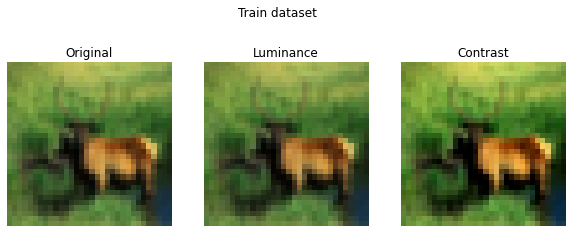

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Train dataset')
ax1.imshow(x_train[0], vmin = 0, vmax = 1)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(x_train_lum[0], vmin = 0, vmax = 1)
ax2.axis('off')
ax2.set_title('Luminance')
ax3.imshow(x_train_contrast[0], vmin = 0, vmax = 1)
ax3.axis('off')
ax3.set_title('Contrast')
plt.show()

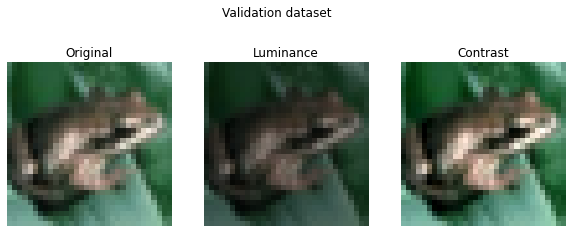

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Validation dataset')
ax1.imshow(x_val[0], vmin = 0, vmax = 1)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(x_val_lum[0], vmin = 0, vmax = 1)
ax2.axis('off')
ax2.set_title('Luminance')
ax3.imshow(x_val_contrast[0], vmin = 0, vmax = 1)
ax3.axis('off')
ax3.set_title('Contrast')
plt.show()

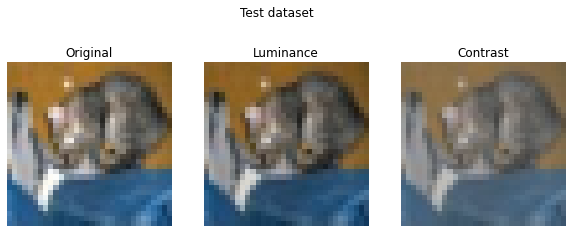

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Test dataset')
ax1.imshow(x_test[0], vmin = 0, vmax = 1)
ax1.axis('off')
ax1.set_title('Original')
ax2.imshow(x_test_lum[0], vmin = 0, vmax = 1)
ax2.axis('off')
ax2.set_title('Luminance')
ax3.imshow(x_test_contrast[0], vmin = 0, vmax = 1)
ax3.axis('off')
ax3.set_title('Contrast')
plt.show()

## First check

In [9]:
model_first = Sequential()
model_first.add(GDN(input_shape = x_train.shape[1:4]))
model_first.add(Conv2D(32, 3, padding  = 'same'))
model_first.add(AveragePooling2D())
model_first.add(GDN())
model_first.add(Conv2D(32, 3, padding  = 'same'))
model_first.add(AveragePooling2D())
model_first.add(Flatten())
model_first.add(Dense(10))
model_first.add(Softmax())

model_first.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model_first.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn (GDN)                    (None, 32, 32, 3)         90        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
gdn_1 (GDN)                  (None, 16, 16, 32)        9312      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [10]:
# Check weights
model_first_weights = model_first.get_weights()
print(model_first_weights)

[array([0.001, 0.001, 0.001], dtype=float32), array([2., 2., 2.], dtype=float32), array([0.5, 0.5, 0.5], dtype=float32), array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]], dtype=float32), array([[[[-0.03127748, -0.1173522 , -0.03132799,  0.1124915 ,
          -0.10283594, -0.02101076, -0.13188016,  0.1223271 ,
          -0.05015854,  0.06139082, -0.13242513,  0.10398215,
           0.0819854 ,  0.0414462

In [11]:
# Train the model
model_first.fit(x_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1407/1407 [==============================] - 17s 7ms/step - loss: 1.7687 - accuracy: 0.3647
Epoch 2/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5668 - accuracy: 0.4479
Epoch 3/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5098 - accuracy: 0.4697
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4743 - accuracy: 0.4809
Epoch 5/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4326 - accuracy: 0.4916


In [12]:
# Check the weights have trained
pesos_model_first_out = model_first.get_weights()
print(pesos_model_first_out)

[array([0.014705  , 0.00112557, 0.02054971], dtype=float32), array([1.8957617, 1.7232096, 2.0072021], dtype=float32), array([0.50215125, 0.5503901 , 0.38641417], dtype=float32), array([[[[0.9209161 , 1.2220445 , 1.1542472 ],
         [1.1788472 , 1.058408  , 1.102677  ],
         [1.0823547 , 1.2370505 , 0.8403413 ]],

        [[0.81172115, 1.1532322 , 1.1956741 ],
         [1.0874054 , 0.9789869 , 1.1143607 ],
         [1.0631816 , 1.1744274 , 0.8356615 ]],

        [[0.8602756 , 1.2270503 , 1.1484802 ],
         [1.0982995 , 1.0490055 , 1.1048939 ],
         [1.0150166 , 1.2152268 , 0.8512229 ]]],


       [[[0.802481  , 0.98267275, 0.9919422 ],
         [1.162035  , 0.86879426, 0.9485376 ],
         [1.1275837 , 1.0947572 , 0.6979822 ]],

        [[0.70943826, 0.9216819 , 1.0512912 ],
         [1.0875266 , 0.80116045, 0.9763914 ],
         [1.1189338 , 1.0419211 , 0.7045747 ]],

        [[0.7555965 , 1.0019727 , 1.0044007 ],
         [1.0951405 , 0.87140584, 0.96266174],
         [1

## Models with the original dataset

### Define the models

In [13]:
# Model with 2 GDN layers
print('Model with 2 GDN layers')
model_original_2_GDN = Sequential()
model_original_2_GDN.add(GDN(input_shape = x_train.shape[1:4]))
model_original_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_original_2_GDN.add(AveragePooling2D())
model_original_2_GDN.add(GDN())
model_original_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_original_2_GDN.add(AveragePooling2D())
model_original_2_GDN.add(Flatten())
model_original_2_GDN.add(Dense(10))
model_original_2_GDN.add(Softmax())

model_original_2_GDN.summary()

# Model with 1 GDN layers
print('Model with 1 GDN layers')
model_original_1_GDN = Sequential()
model_original_1_GDN.add(GDN(input_shape = x_train.shape[1:4]))
model_original_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_original_1_GDN.add(AveragePooling2D())
model_original_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_original_1_GDN.add(AveragePooling2D())
model_original_1_GDN.add(Flatten())
model_original_1_GDN.add(Dense(10))
model_original_1_GDN.add(Softmax())

model_original_1_GDN.summary()

# Model with NO GDN layers
print('Model with no GDN layers')
model_original_no_GDN = Sequential()
model_original_no_GDN.add(Conv2D(32, 3, padding  = 'same', input_shape = x_train.shape[1:4]))
model_original_no_GDN.add(AveragePooling2D())
model_original_no_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_original_no_GDN.add(AveragePooling2D())
model_original_no_GDN.add(Flatten())
model_original_no_GDN.add(Dense(10))
model_original_no_GDN.add(Softmax())

model_original_no_GDN.summary()

Model with 2 GDN layers
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_2 (GDN)                  (None, 32, 32, 3)         90        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
gdn_3 (GDN)                  (None, 16, 16, 32)        9312      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d_3 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (

### Train the models

In [14]:
# Train the model with 2 GDN layers
lr_original_2_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_original_2_GDN.compile(loss = 'categorical_crossentropy', 
                             optimizer = Adam(learning_rate = lr_original_2_gdn), 
                             metrics = ['accuracy'])

history_original_2_gdn = model_original_2_GDN.fit(x_train, y_train, 
                                                  epochs = 300, 
                                                  batch_size = 32, 
                                                  callbacks = [reduce_lr],
                                                  validation_data = (x_val, y_val))

Epoch 1/300
1407/1407 [==============================] - 10s 6ms/step - loss: 1.9551 - accuracy: 0.2870 - val_loss: 1.7820 - val_accuracy: 0.3520
Epoch 2/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7384 - accuracy: 0.3787 - val_loss: 1.6856 - val_accuracy: 0.3930
Epoch 3/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6647 - accuracy: 0.4081 - val_loss: 1.6558 - val_accuracy: 0.4106
Epoch 4/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6142 - accuracy: 0.4300 - val_loss: 1.5869 - val_accuracy: 0.4438
Epoch 5/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5741 - accuracy: 0.4468 - val_loss: 1.5600 - val_accuracy: 0.4492
Epoch 6/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5476 - accuracy: 0.4580 - val_loss: 1.5450 - val_accuracy: 0.4552
Epoch 7/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5319 - accuracy: 0.4630 - val_loss: 1.5332 - val_

1407/1407 [==============================] - 9s 7ms/step - loss: 1.2339 - accuracy: 0.5658 - val_loss: 1.2990 - val_accuracy: 0.5412
Epoch 58/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2321 - accuracy: 0.5668 - val_loss: 1.2923 - val_accuracy: 0.5422
Epoch 59/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2289 - accuracy: 0.5671 - val_loss: 1.3062 - val_accuracy: 0.5360
Epoch 60/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2256 - accuracy: 0.5669 - val_loss: 1.3007 - val_accuracy: 0.5364
Epoch 61/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2223 - accuracy: 0.5690 - val_loss: 1.2985 - val_accuracy: 0.5416
Epoch 62/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2189 - accuracy: 0.5711 - val_loss: 1.2793 - val_accuracy: 0.5454
Epoch 63/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2177 - accuracy: 0.5715 - val_loss: 1.2914 - val_accura

1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5942 - val_loss: 1.2614 - val_accuracy: 0.5498
Epoch 112/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5940 - val_loss: 1.2613 - val_accuracy: 0.5498
Epoch 113/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5938 - val_loss: 1.2613 - val_accuracy: 0.5496
Epoch 114/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5941 - val_loss: 1.2613 - val_accuracy: 0.5496
Epoch 115/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5939 - val_loss: 1.2613 - val_accuracy: 0.5498
Epoch 116/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5939 - val_loss: 1.2613 - val_accuracy: 0.5498
Epoch 117/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1557 - accuracy: 0.5940 - val_loss: 1.2613 - val_ac

Epoch 167/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5942 - val_loss: 1.2612 - val_accuracy: 0.5502
Epoch 168/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5941 - val_loss: 1.2612 - val_accuracy: 0.5498
Epoch 169/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5941 - val_loss: 1.2612 - val_accuracy: 0.5500
Epoch 170/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5940 - val_loss: 1.2612 - val_accuracy: 0.5498
Epoch 171/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5942 - val_loss: 1.2612 - val_accuracy: 0.5500
Epoch 172/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5940 - val_loss: 1.2613 - val_accuracy: 0.5498
Epoch 173/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1554 - accuracy: 0.5941 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5942 - val_loss: 1.2610 - val_accuracy: 0.5502
Epoch 224/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5944 - val_loss: 1.2611 - val_accuracy: 0.5506
Epoch 225/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5942 - val_loss: 1.2612 - val_accuracy: 0.5508
Epoch 226/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5943 - val_loss: 1.2612 - val_accuracy: 0.5508
Epoch 227/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5943 - val_loss: 1.2610 - val_accuracy: 0.5502
Epoch 228/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1551 - accuracy: 0.5942 - val_loss: 1.2611 - val_accuracy: 0.5508
Epoch 229/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1551 - accuracy: 0.5943 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5944 - val_loss: 1.2610 - val_accuracy: 0.5512
Epoch 280/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5943 - val_loss: 1.2609 - val_accuracy: 0.5504
Epoch 281/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5944 - val_loss: 1.2609 - val_accuracy: 0.5510
Epoch 282/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5945 - val_loss: 1.2609 - val_accuracy: 0.5506
Epoch 283/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5942 - val_loss: 1.2609 - val_accuracy: 0.5504
Epoch 284/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5943 - val_loss: 1.2609 - val_accuracy: 0.5508
Epoch 285/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1548 - accuracy: 0.5941 - val_loss: 1

In [15]:
# Train the model with 1 GDN layers
lr_original_1_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_original_1_GDN.compile(loss = 'categorical_crossentropy', 
                             optimizer = Adam(learning_rate = lr_original_1_gdn), 
                             metrics = ['accuracy'])

history_original_1_gdn = model_original_1_GDN.fit(x_train, y_train, 
                                                  epochs = 300, 
                                                  batch_size = 32, 
                                                  callbacks = [reduce_lr],
                                                  validation_data = (x_val, y_val))

Epoch 1/300
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0670 - accuracy: 0.2446 - val_loss: 1.9583 - val_accuracy: 0.2956
Epoch 2/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9286 - accuracy: 0.3174 - val_loss: 1.8940 - val_accuracy: 0.3344
Epoch 3/300
1407/1407 [==============================] - 6s 5ms/step - loss: 1.8651 - accuracy: 0.3470 - val_loss: 1.8314 - val_accuracy: 0.3718
Epoch 4/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8210 - accuracy: 0.3659 - val_loss: 1.7927 - val_accuracy: 0.3936
Epoch 5/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7875 - accuracy: 0.3810 - val_loss: 1.7714 - val_accuracy: 0.3872
Epoch 6/300
1407/1407 [==============================] - 6s 5ms/step - loss: 1.7604 - accuracy: 0.3918 - val_loss: 1.7510 - val_accuracy: 0.3932
Epoch 7/300
1407/1407 [==============================] - 6s 5ms/step - loss: 1.7396 - accuracy: 0.4002 - val_loss: 1.7256 - val_ac

1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4577 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 56/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 57/300
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5983 - accuracy: 0.4577 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 58/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4577 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 59/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4576 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 60/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 61/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4577 - val_loss: 1.6204 - val_accuracy

1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 112/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5983 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 113/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4592
Epoch 114/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 115/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 116/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4592
Epoch 117/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_ac

Epoch 167/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 168/300
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5982 - accuracy: 0.4580 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 169/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 170/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 171/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 172/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 173/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4578 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4581 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 224/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 225/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4580 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 226/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 227/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4592
Epoch 228/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 229/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 280/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4580 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 281/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 282/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 283/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4594
Epoch 284/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5981 - accuracy: 0.4578 - val_loss: 1.6204 - val_accuracy: 0.4596
Epoch 285/300
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5981 - accuracy: 0.4579 - val_loss: 1

In [16]:
# Train the model with no GDN layers
lr_original_no_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_original_no_GDN.compile(loss = 'categorical_crossentropy', 
                             optimizer = Adam(learning_rate = lr_original_no_gdn), 
                             metrics = ['accuracy'])

history_original_no_GDN = model_original_no_GDN.fit(x_train, y_train, 
                                                    epochs = 300, 
                                                    batch_size = 32, 
                                                    callbacks = [reduce_lr],
                                                    validation_data = (x_val, y_val))

Epoch 1/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9750 - accuracy: 0.3024 - val_loss: 1.8509 - val_accuracy: 0.3454
Epoch 2/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8195 - accuracy: 0.3694 - val_loss: 1.7735 - val_accuracy: 0.3876
Epoch 3/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7782 - accuracy: 0.3861 - val_loss: 1.7475 - val_accuracy: 0.4002
Epoch 4/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7547 - accuracy: 0.3957 - val_loss: 1.7395 - val_accuracy: 0.3950
Epoch 5/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7395 - accuracy: 0.4011 - val_loss: 1.7247 - val_accuracy: 0.4068
Epoch 6/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7298 - accuracy: 0.4047 - val_loss: 1.7161 - val_accuracy: 0.4118
Epoch 7/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7229 - accuracy: 0.4125 - val_loss: 1.7089 - val_ac

1407/1407 [==============================] - 5s 3ms/step - loss: 1.6775 - accuracy: 0.4315 - val_loss: 1.6908 - val_accuracy: 0.4300
Epoch 56/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6775 - accuracy: 0.4314 - val_loss: 1.6908 - val_accuracy: 0.4296
Epoch 57/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6775 - accuracy: 0.4314 - val_loss: 1.6908 - val_accuracy: 0.4300
Epoch 58/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6775 - accuracy: 0.4315 - val_loss: 1.6908 - val_accuracy: 0.4300
Epoch 59/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6775 - accuracy: 0.4315 - val_loss: 1.6908 - val_accuracy: 0.4300
Epoch 60/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6775 - accuracy: 0.4314 - val_loss: 1.6907 - val_accuracy: 0.4300
Epoch 61/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6775 - accuracy: 0.4315 - val_loss: 1.6907 - val_accuracy

1407/1407 [==============================] - 5s 3ms/step - loss: 1.6774 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 112/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6774 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 113/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6774 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 114/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6774 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 115/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6774 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 116/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6774 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 117/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6774 - accuracy: 0.4315 - val_loss: 1.6907 - val_ac

Epoch 167/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 168/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4296
Epoch 169/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 170/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4292
Epoch 171/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 172/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 173/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 224/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4316 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 225/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 226/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 227/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 228/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4294
Epoch 229/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6773 - accuracy: 0.4318 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6772 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4292
Epoch 280/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6772 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4292
Epoch 281/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6772 - accuracy: 0.4317 - val_loss: 1.6907 - val_accuracy: 0.4292
Epoch 282/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6772 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4290
Epoch 283/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6772 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4290
Epoch 284/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6772 - accuracy: 0.4318 - val_loss: 1.6907 - val_accuracy: 0.4290
Epoch 285/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6772 - accuracy: 0.4317 - val_loss: 1

### Plot the training histories

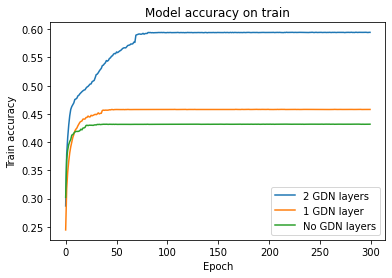

In [18]:
# Plot the train accuracy
plt.plot(history_original_2_gdn.history['accuracy'])
plt.plot(history_original_1_gdn.history['accuracy'])
plt.plot(history_original_no_GDN.history['accuracy'])
plt.title('Model accuracy on train')
plt.ylabel('Train accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

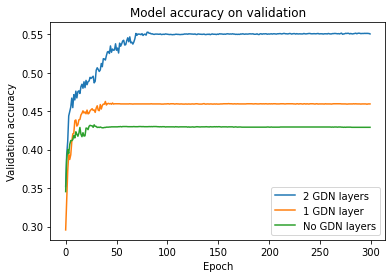

In [19]:
# Plot the validation accuracy
plt.plot(history_original_2_gdn.history['val_accuracy'])
plt.plot(history_original_1_gdn.history['val_accuracy'])
plt.plot(history_original_no_GDN.history['val_accuracy'])
plt.title('Model accuracy on validation')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

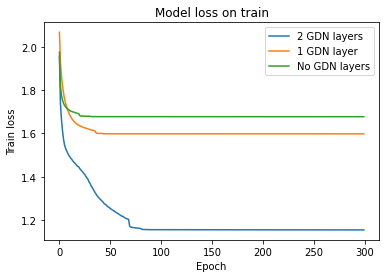

In [21]:
# Plot the train loss
plt.plot(history_original_2_gdn.history['loss'])
plt.plot(history_original_1_gdn.history['loss'])
plt.plot(history_original_no_GDN.history['loss'])
plt.title('Model loss on train')
plt.ylabel('Train loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

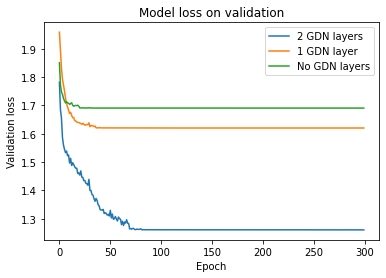

In [22]:
# Plot the validation loss
plt.plot(history_original_2_gdn.history['val_loss'])
plt.plot(history_original_1_gdn.history['val_loss'])
plt.plot(history_original_no_GDN.history['val_loss'])
plt.title('Model loss on validation')
plt.ylabel('Validation loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

### Evaluate the models

In [23]:
# Evaluate the model with 2 GDN layers
print(model_original_2_GDN.evaluate(x_test, y_test))

# Evaluate the model with 1 GDN layer
print(model_original_1_GDN.evaluate(x_test, y_test))

# Evaluate the model with no GDN layers
print(model_original_no_GDN.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 1.2678 - accuracy: 0.5530
[1.267764925956726, 0.5529999732971191]
313/313 [==============================] - 1s 2ms/step - loss: 1.6236 - accuracy: 0.4459
[1.6236096620559692, 0.44589999318122864]
313/313 [==============================] - 1s 2ms/step - loss: 1.6946 - accuracy: 0.4168
[1.6946138143539429, 0.41679999232292175]


## Models with the luminance dataset

### Define the models

In [44]:
# Model with 2 GDN layers
print('Model with 2 GDN layers')
model_lum_2_GDN = Sequential()
model_lum_2_GDN.add(GDN(input_shape = x_train_lum.shape[1:4]))
model_lum_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_lum_2_GDN.add(AveragePooling2D())
model_lum_2_GDN.add(GDN())
model_lum_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_lum_2_GDN.add(AveragePooling2D())
model_lum_2_GDN.add(Flatten())
model_lum_2_GDN.add(Dense(10))
model_lum_2_GDN.add(Softmax())

model_lum_2_GDN.summary()

# Model with 1 GDN layers
print('Model with 1 GDN layers')
model_lum_1_GDN = Sequential()
model_lum_1_GDN.add(GDN(input_shape = x_train_lum.shape[1:4]))
model_lum_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_lum_1_GDN.add(AveragePooling2D())
model_lum_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_lum_1_GDN.add(AveragePooling2D())
model_lum_1_GDN.add(Flatten())
model_lum_1_GDN.add(Dense(10))
model_lum_1_GDN.add(Softmax())

model_lum_1_GDN.summary()

# Model with NO GDN layers
print('Model with no GDN layers')
model_lum_no_GDN = Sequential()
model_lum_no_GDN.add(Conv2D(32, 3, padding  = 'same', input_shape = x_train_lum.shape[1:4]))
model_lum_no_GDN.add(AveragePooling2D())
model_lum_no_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_lum_no_GDN.add(AveragePooling2D())
model_lum_no_GDN.add(Flatten())
model_lum_no_GDN.add(Dense(10))
model_lum_no_GDN.add(Softmax())

model_lum_no_GDN.summary()

Model with 2 GDN layers
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_14 (GDN)                 (None, 32, 32, 3)         90        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d_24 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
gdn_15 (GDN)                 (None, 16, 16, 32)        9312      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d_25 (Averag (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         

### Train the models

In [45]:
# Train the model with 2 GDN layers
lr_lum_2_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_lum_2_GDN.compile(loss = 'categorical_crossentropy', 
                        optimizer = Adam(learning_rate = lr_lum_2_gdn), 
                        metrics = ['accuracy'])

history_lum_2_gdn = model_lum_2_GDN.fit(x_train_lum, y_train, 
                                        epochs = 300, 
                                        batch_size = 32, 
                                        callbacks = [reduce_lr],
                                        validation_data = (x_val_lum, y_val))

Epoch 1/300
1407/1407 [==============================] - 11s 7ms/step - loss: 1.9876 - accuracy: 0.2739 - val_loss: 1.7994 - val_accuracy: 0.3500
Epoch 2/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7462 - accuracy: 0.3780 - val_loss: 1.6760 - val_accuracy: 0.4112
Epoch 3/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6629 - accuracy: 0.4127 - val_loss: 1.6223 - val_accuracy: 0.4214
Epoch 4/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6109 - accuracy: 0.4361 - val_loss: 1.5879 - val_accuracy: 0.4406
Epoch 5/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5805 - accuracy: 0.4462 - val_loss: 1.5720 - val_accuracy: 0.4452
Epoch 6/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5614 - accuracy: 0.4544 - val_loss: 1.5579 - val_accuracy: 0.4528
Epoch 7/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5460 - accuracy: 0.4566 - val_loss: 1.5496 -

Epoch 57/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2458 - accuracy: 0.5608 - val_loss: 1.3185 - val_accuracy: 0.5256
Epoch 58/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2417 - accuracy: 0.5626 - val_loss: 1.3050 - val_accuracy: 0.5380
Epoch 59/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2389 - accuracy: 0.5640 - val_loss: 1.3059 - val_accuracy: 0.5354
Epoch 60/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2338 - accuracy: 0.5671 - val_loss: 1.3053 - val_accuracy: 0.5330
Epoch 61/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2280 - accuracy: 0.5690 - val_loss: 1.2834 - val_accuracy: 0.5386
Epoch 62/300
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2238 - accuracy: 0.5709 - val_loss: 1.2982 - val_accuracy: 0.5386
Epoch 63/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2165 - accuracy: 0.5737 - val_loss: 1

1407/1407 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6331 - val_loss: 1.1807 - val_accuracy: 0.5884
Epoch 112/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6330 - val_loss: 1.1806 - val_accuracy: 0.5884
Epoch 113/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0638 - accuracy: 0.6330 - val_loss: 1.1807 - val_accuracy: 0.5878
Epoch 114/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6328 - val_loss: 1.1807 - val_accuracy: 0.5876
Epoch 115/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6329 - val_loss: 1.1806 - val_accuracy: 0.5878
Epoch 116/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0638 - accuracy: 0.6331 - val_loss: 1.1807 - val_accuracy: 0.5878
Epoch 117/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0637 - accuracy: 0.6329 - val_loss: 1.1807 - val_ac

Epoch 167/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0634 - accuracy: 0.6329 - val_loss: 1.1806 - val_accuracy: 0.5876
Epoch 168/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0634 - accuracy: 0.6327 - val_loss: 1.1805 - val_accuracy: 0.5876
Epoch 169/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0634 - accuracy: 0.6328 - val_loss: 1.1806 - val_accuracy: 0.5872
Epoch 170/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0634 - accuracy: 0.6328 - val_loss: 1.1805 - val_accuracy: 0.5876
Epoch 171/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0634 - accuracy: 0.6329 - val_loss: 1.1805 - val_accuracy: 0.5876
Epoch 172/300
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0634 - accuracy: 0.6329 - val_loss: 1.1804 - val_accuracy: 0.5866
Epoch 173/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0634 - accuracy: 0.6326 - val_loss: 1

1407/1407 [==============================] - 10s 7ms/step - loss: 1.0631 - accuracy: 0.6330 - val_loss: 1.1804 - val_accuracy: 0.5870
Epoch 223/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0631 - accuracy: 0.6327 - val_loss: 1.1805 - val_accuracy: 0.5870
Epoch 224/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0630 - accuracy: 0.6329 - val_loss: 1.1805 - val_accuracy: 0.5866
Epoch 225/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0630 - accuracy: 0.6328 - val_loss: 1.1804 - val_accuracy: 0.5872
Epoch 226/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0630 - accuracy: 0.6328 - val_loss: 1.1804 - val_accuracy: 0.5870
Epoch 227/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0630 - accuracy: 0.6327 - val_loss: 1.1804 - val_accuracy: 0.5872
Epoch 228/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0630 - accuracy: 0.6328 - val_loss: 1.1805 -

1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6332 - val_loss: 1.1802 - val_accuracy: 0.5874
Epoch 278/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6328 - val_loss: 1.1802 - val_accuracy: 0.5870
Epoch 279/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6330 - val_loss: 1.1801 - val_accuracy: 0.5866
Epoch 280/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6331 - val_loss: 1.1801 - val_accuracy: 0.5874
Epoch 281/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6329 - val_loss: 1.1802 - val_accuracy: 0.5866
Epoch 282/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6328 - val_loss: 1.1803 - val_accuracy: 0.5868
Epoch 283/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0627 - accuracy: 0.6330 - val_loss: 1.1803 -

In [46]:
# Train the model with 1 GDN layers
lr_lum_1_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_lum_1_GDN.compile(loss = 'categorical_crossentropy', 
                        optimizer = Adam(learning_rate = lr_lum_1_gdn), 
                        metrics = ['accuracy'])

history_lum_1_gdn = model_lum_1_GDN.fit(x_train_lum, y_train, 
                                        epochs = 300, 
                                        batch_size = 32, 
                                        callbacks = [reduce_lr],
                                        validation_data = (x_val_lum, y_val))

Epoch 1/300
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0786 - accuracy: 0.2475 - val_loss: 1.9661 - val_accuracy: 0.3054
Epoch 2/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9315 - accuracy: 0.3188 - val_loss: 1.8897 - val_accuracy: 0.3446
Epoch 3/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8675 - accuracy: 0.3471 - val_loss: 1.8361 - val_accuracy: 0.3648
Epoch 4/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8255 - accuracy: 0.3648 - val_loss: 1.7899 - val_accuracy: 0.3838
Epoch 5/300
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7867 - accuracy: 0.3785 - val_loss: 1.7576 - val_accuracy: 0.3944
Epoch 6/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7624 - accuracy: 0.3900 - val_loss: 1.7414 - val_accuracy: 0.3964
Epoch 7/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7447 - accuracy: 0.3977 - val_loss: 1.7358 - val_ac

1407/1407 [==============================] - 7s 5ms/step - loss: 1.6302 - accuracy: 0.4472 - val_loss: 1.6547 - val_accuracy: 0.4480
Epoch 57/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6303 - accuracy: 0.4472 - val_loss: 1.6548 - val_accuracy: 0.4466
Epoch 58/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6301 - accuracy: 0.4474 - val_loss: 1.6550 - val_accuracy: 0.4468
Epoch 59/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6302 - accuracy: 0.4475 - val_loss: 1.6549 - val_accuracy: 0.4470
Epoch 60/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6301 - accuracy: 0.4471 - val_loss: 1.6547 - val_accuracy: 0.4470
Epoch 61/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6301 - accuracy: 0.4477 - val_loss: 1.6549 - val_accuracy: 0.4464

Epoch 00061: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 62/300
1407/1407 [==============================] - 7s 5ms/step - 

1407/1407 [==============================] - 8s 5ms/step - loss: 1.6298 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 112/300
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6298 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4470
Epoch 113/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6298 - accuracy: 0.4479 - val_loss: 1.6548 - val_accuracy: 0.4472
Epoch 114/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6298 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 115/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6298 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 116/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6298 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 117/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6298 - accuracy: 0.4478 - val_loss: 1.6548 - val_ac

Epoch 167/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 168/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 169/300
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4470
Epoch 170/300
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6297 - accuracy: 0.4479 - val_loss: 1.6548 - val_accuracy: 0.4470
Epoch 171/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4470
Epoch 172/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4470
Epoch 173/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4479 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 224/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 225/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 226/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4477 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 227/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4479 - val_loss: 1.6548 - val_accuracy: 0.4472
Epoch 228/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4479 - val_loss: 1.6547 - val_accuracy: 0.4472
Epoch 229/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6297 - accuracy: 0.4480 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4479 - val_loss: 1.6548 - val_accuracy: 0.4470
Epoch 280/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4479 - val_loss: 1.6548 - val_accuracy: 0.4468
Epoch 281/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4478 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 282/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4480 - val_loss: 1.6548 - val_accuracy: 0.4468
Epoch 283/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4477 - val_loss: 1.6547 - val_accuracy: 0.4468
Epoch 284/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4478 - val_loss: 1.6548 - val_accuracy: 0.4470
Epoch 285/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6296 - accuracy: 0.4479 - val_loss: 1

In [47]:
# Train the model with no GDN layers
lr_lum_no_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_lum_no_GDN.compile(loss = 'categorical_crossentropy', 
                         optimizer = Adam(learning_rate = lr_lum_no_gdn), 
                         metrics = ['accuracy'])

history_lum_no_gdn = model_lum_no_GDN.fit(x_train_lum, y_train, 
                                          epochs = 300, 
                                          batch_size = 32, 
                                          callbacks = [reduce_lr],
                                          validation_data = (x_val_lum, y_val))

Epoch 1/300
1407/1407 [==============================] - 5s 3ms/step - loss: 2.0208 - accuracy: 0.2955 - val_loss: 1.9154 - val_accuracy: 0.3438
Epoch 2/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8896 - accuracy: 0.3577 - val_loss: 1.8606 - val_accuracy: 0.3656
Epoch 3/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8501 - accuracy: 0.3745 - val_loss: 1.8294 - val_accuracy: 0.3902
Epoch 4/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8300 - accuracy: 0.3854 - val_loss: 1.8151 - val_accuracy: 0.3912
Epoch 5/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8153 - accuracy: 0.3932 - val_loss: 1.8041 - val_accuracy: 0.3982
Epoch 6/300
1407/1407 [==============================] - 6s 4ms/step - loss: 1.8031 - accuracy: 0.3978 - val_loss: 1.8066 - val_accuracy: 0.3960
Epoch 7/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7959 - accuracy: 0.3999 - val_loss: 1.7888 - val_ac

1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4259 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 56/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4259 - val_loss: 1.7698 - val_accuracy: 0.4250
Epoch 57/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4259 - val_loss: 1.7698 - val_accuracy: 0.4250
Epoch 58/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4259 - val_loss: 1.7698 - val_accuracy: 0.4248
Epoch 59/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4258 - val_loss: 1.7698 - val_accuracy: 0.4252
Epoch 60/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4259 - val_loss: 1.7698 - val_accuracy: 0.4252
Epoch 61/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy

1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 112/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 113/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 114/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4248
Epoch 115/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 116/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7390 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4246
Epoch 117/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7390 - accuracy: 0.4260 - val_loss: 1.7698 - val_ac

Epoch 167/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 168/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 169/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4262 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 170/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 171/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 172/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 173/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 224/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 225/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 226/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 227/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 228/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4244
Epoch 229/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7389 - accuracy: 0.4260 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7388 - accuracy: 0.4262 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 280/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 281/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4260 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 282/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4261 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 283/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4262 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 284/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4262 - val_loss: 1.7698 - val_accuracy: 0.4242
Epoch 285/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7388 - accuracy: 0.4260 - val_loss: 1

### Plot the training histories

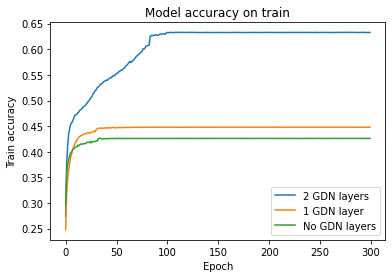

In [48]:
# Plot the train accuracy
plt.plot(history_lum_2_gdn.history['accuracy'])
plt.plot(history_lum_1_gdn.history['accuracy'])
plt.plot(history_lum_no_gdn.history['accuracy'])
plt.title('Model accuracy on train')
plt.ylabel('Train accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

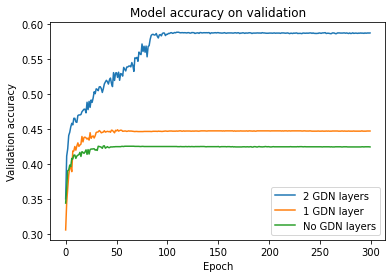

In [49]:
# Plot the validation accuracy
plt.plot(history_lum_2_gdn.history['val_accuracy'])
plt.plot(history_lum_1_gdn.history['val_accuracy'])
plt.plot(history_lum_no_gdn.history['val_accuracy'])
plt.title('Model accuracy on validation')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

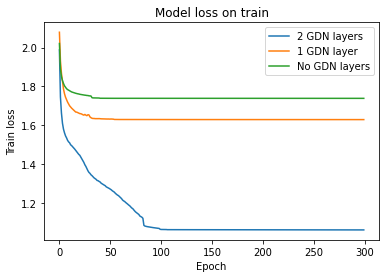

In [50]:
# Plot the train loss
plt.plot(history_lum_2_gdn.history['loss'])
plt.plot(history_lum_1_gdn.history['loss'])
plt.plot(history_lum_no_gdn.history['loss'])
plt.title('Model loss on train')
plt.ylabel('Train loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

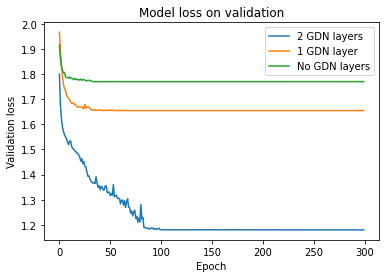

In [51]:
# Plot the validation loss
plt.plot(history_lum_2_gdn.history['val_loss'])
plt.plot(history_lum_1_gdn.history['val_loss'])
plt.plot(history_lum_no_gdn.history['val_loss'])
plt.title('Model loss on validation')
plt.ylabel('Validation loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

### Evaluate the models

In [52]:
# Evaluate the model with 2 GDN layers
print(model_lum_2_GDN.evaluate(x_test_lum, y_test))

# Evaluate the model with 1 GDN layer
print(model_lum_1_GDN.evaluate(x_test_lum, y_test))

# Evaluate the model with no GDN layers
print(model_lum_no_GDN.evaluate(x_test_lum, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 1.1993 - accuracy: 0.5736
[1.1993138790130615, 0.5735999941825867]
313/313 [==============================] - 1s 2ms/step - loss: 1.6578 - accuracy: 0.4379
[1.657840609550476, 0.43790000677108765]
313/313 [==============================] - 1s 2ms/step - loss: 1.7611 - accuracy: 0.4139
[1.7611114978790283, 0.4138999879360199]


## Models with the contrast dataset

### Define the models

In [35]:
# Model with 2 GDN layers
print('Model with 2 GDN layers')
model_contrast_2_GDN = Sequential()
model_contrast_2_GDN.add(GDN(input_shape = x_train_contrast.shape[1:4]))
model_contrast_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_contrast_2_GDN.add(AveragePooling2D())
model_contrast_2_GDN.add(GDN())
model_contrast_2_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_contrast_2_GDN.add(AveragePooling2D())
model_contrast_2_GDN.add(Flatten())
model_contrast_2_GDN.add(Dense(10))
model_contrast_2_GDN.add(Softmax())

model_contrast_2_GDN.summary()

# Model with 1 GDN layers
print('Model with 1 GDN layers')
model_contrast_1_GDN = Sequential()
model_contrast_1_GDN.add(GDN(input_shape = x_train_contrast.shape[1:4]))
model_contrast_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_contrast_1_GDN.add(AveragePooling2D())
model_contrast_1_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_contrast_1_GDN.add(AveragePooling2D())
model_contrast_1_GDN.add(Flatten())
model_contrast_1_GDN.add(Dense(10))
model_contrast_1_GDN.add(Softmax())

model_contrast_1_GDN.summary()

# Model with NO GDN layers
print('Model with no GDN layers')
model_contrast_no_GDN = Sequential()
model_contrast_no_GDN.add(Conv2D(32, 3, padding  = 'same', input_shape = x_train_contrast.shape[1:4]))
model_contrast_no_GDN.add(AveragePooling2D())
model_contrast_no_GDN.add(Conv2D(32, 3, padding  = 'same'))
model_contrast_no_GDN.add(AveragePooling2D())
model_contrast_no_GDN.add(Flatten())
model_contrast_no_GDN.add(Dense(10))
model_contrast_no_GDN.add(Softmax())

model_contrast_no_GDN.summary()

Model with 2 GDN layers
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_11 (GDN)                 (None, 32, 32, 3)         90        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
gdn_12 (GDN)                 (None, 16, 16, 32)        9312      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          

### Train the models

In [36]:
# Train the model with 2 GDN layers
lr_contrast_2_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_contrast_2_GDN.compile(loss = 'categorical_crossentropy', 
                             optimizer = Adam(learning_rate = lr_contrast_2_gdn), 
                             metrics = ['accuracy'])

history_contrast_2_gdn = model_contrast_2_GDN.fit(x_train_contrast, y_train, 
                                                  epochs = 300, 
                                                  batch_size = 32, 
                                                  callbacks = [reduce_lr],
                                                  validation_data = (x_val_contrast, y_val))

Epoch 1/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9806 - accuracy: 0.2749 - val_loss: 1.8514 - val_accuracy: 0.3354
Epoch 2/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8171 - accuracy: 0.3485 - val_loss: 1.7650 - val_accuracy: 0.3662
Epoch 3/300
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7500 - accuracy: 0.3768 - val_loss: 1.7078 - val_accuracy: 0.3902
Epoch 4/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6967 - accuracy: 0.4007 - val_loss: 1.6598 - val_accuracy: 0.4094
Epoch 5/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6587 - accuracy: 0.4195 - val_loss: 1.6321 - val_accuracy: 0.4286
Epoch 6/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6339 - accuracy: 0.4317 - val_loss: 1.6167 - val_accuracy: 0.4296
Epoch 7/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6200 - accuracy: 0.4342 - val_loss: 1.6025 - 

Epoch 57/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3664 - accuracy: 0.5221 - val_loss: 1.4069 - val_accuracy: 0.5016
Epoch 58/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3645 - accuracy: 0.5236 - val_loss: 1.4611 - val_accuracy: 0.4844
Epoch 59/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3606 - accuracy: 0.5250 - val_loss: 1.4153 - val_accuracy: 0.4958
Epoch 60/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3563 - accuracy: 0.5247 - val_loss: 1.4214 - val_accuracy: 0.4926
Epoch 61/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3536 - accuracy: 0.5264 - val_loss: 1.4133 - val_accuracy: 0.4990
Epoch 62/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.3484 - accuracy: 0.5280 - val_loss: 1.4399 - val_accuracy: 0.4860

Epoch 00062: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 63/300
1407/1407 [=============

1407/1407 [==============================] - 11s 8ms/step - loss: 1.2956 - accuracy: 0.5490 - val_loss: 1.3867 - val_accuracy: 0.5062
Epoch 112/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2956 - accuracy: 0.5492 - val_loss: 1.3866 - val_accuracy: 0.5064
Epoch 113/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2956 - accuracy: 0.5492 - val_loss: 1.3866 - val_accuracy: 0.5058
Epoch 114/300
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2956 - accuracy: 0.5492 - val_loss: 1.3866 - val_accuracy: 0.5062
Epoch 115/300
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2956 - accuracy: 0.5491 - val_loss: 1.3866 - val_accuracy: 0.5062
Epoch 116/300
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2956 - accuracy: 0.5491 - val_loss: 1.3866 - val_accuracy: 0.5062
Epoch 117/300
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2956 - accuracy: 0.5490 - val_loss: 1.3866 -

1407/1407 [==============================] - 15s 11ms/step - loss: 1.2952 - accuracy: 0.5492 - val_loss: 1.3864 - val_accuracy: 0.5056
Epoch 167/300
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2952 - accuracy: 0.5490 - val_loss: 1.3864 - val_accuracy: 0.5056
Epoch 168/300
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2952 - accuracy: 0.5494 - val_loss: 1.3864 - val_accuracy: 0.5054
Epoch 169/300
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2952 - accuracy: 0.5492 - val_loss: 1.3864 - val_accuracy: 0.5054
Epoch 170/300
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2951 - accuracy: 0.5489 - val_loss: 1.3863 - val_accuracy: 0.5046
Epoch 171/300
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2951 - accuracy: 0.5492 - val_loss: 1.3864 - val_accuracy: 0.5058
Epoch 172/300
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2951 - accuracy: 0.5490 - val_loss: 1

1407/1407 [==============================] - 13s 9ms/step - loss: 1.2948 - accuracy: 0.5491 - val_loss: 1.3862 - val_accuracy: 0.5056
Epoch 222/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2948 - accuracy: 0.5492 - val_loss: 1.3862 - val_accuracy: 0.5054
Epoch 223/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2948 - accuracy: 0.5492 - val_loss: 1.3862 - val_accuracy: 0.5060
Epoch 224/300
1407/1407 [==============================] - 44s 31ms/step - loss: 1.2947 - accuracy: 0.5492 - val_loss: 1.3861 - val_accuracy: 0.5046
Epoch 225/300
1407/1407 [==============================] - 49s 35ms/step - loss: 1.2947 - accuracy: 0.5490 - val_loss: 1.3861 - val_accuracy: 0.5046
Epoch 226/300
1407/1407 [==============================] - 49s 35ms/step - loss: 1.2947 - accuracy: 0.5490 - val_loss: 1.3862 - val_accuracy: 0.5056
Epoch 227/300
1407/1407 [==============================] - 55s 39ms/step - loss: 1.2947 - accuracy: 0.5492 - val_loss: 1.38

1407/1407 [==============================] - 10s 7ms/step - loss: 1.2944 - accuracy: 0.5492 - val_loss: 1.3860 - val_accuracy: 0.5054
Epoch 277/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2943 - accuracy: 0.5493 - val_loss: 1.3860 - val_accuracy: 0.5056
Epoch 278/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2944 - accuracy: 0.5491 - val_loss: 1.3860 - val_accuracy: 0.5054
Epoch 279/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2943 - accuracy: 0.5492 - val_loss: 1.3860 - val_accuracy: 0.5054
Epoch 280/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2943 - accuracy: 0.5494 - val_loss: 1.3860 - val_accuracy: 0.5056
Epoch 281/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2943 - accuracy: 0.5494 - val_loss: 1.3860 - val_accuracy: 0.5056
Epoch 282/300
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2943 - accuracy: 0.5494 - val_loss: 1.3860 -

In [37]:
# Train the model with 1 GDN layers
lr_contrast_1_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_contrast_1_GDN.compile(loss = 'categorical_crossentropy', 
                             optimizer = Adam(learning_rate = lr_contrast_1_gdn), 
                             metrics = ['accuracy'])

history_contrast_1_gdn = model_contrast_1_GDN.fit(x_train_contrast, y_train, 
                                                  epochs = 300, 
                                                  batch_size = 32, 
                                                  callbacks = [reduce_lr],
                                                  validation_data = (x_val_contrast, y_val))

Epoch 1/300
1407/1407 [==============================] - 7s 5ms/step - loss: 2.0977 - accuracy: 0.2360 - val_loss: 1.9936 - val_accuracy: 0.2926
Epoch 2/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9626 - accuracy: 0.3077 - val_loss: 1.9240 - val_accuracy: 0.3372
Epoch 3/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9095 - accuracy: 0.3335 - val_loss: 1.8836 - val_accuracy: 0.3586
Epoch 4/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8787 - accuracy: 0.3483 - val_loss: 1.8637 - val_accuracy: 0.3606
Epoch 5/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8583 - accuracy: 0.3587 - val_loss: 1.8407 - val_accuracy: 0.3634
Epoch 6/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8427 - accuracy: 0.3682 - val_loss: 1.8258 - val_accuracy: 0.3878
Epoch 7/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8295 - accuracy: 0.3727 - val_loss: 1.8206 - val_ac

1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4194 - val_loss: 1.7602 - val_accuracy: 0.4080
Epoch 57/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4193 - val_loss: 1.7602 - val_accuracy: 0.4080
Epoch 58/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4193 - val_loss: 1.7602 - val_accuracy: 0.4080
Epoch 59/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4192 - val_loss: 1.7602 - val_accuracy: 0.4080
Epoch 60/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4193 - val_loss: 1.7602 - val_accuracy: 0.4082
Epoch 61/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4192 - val_loss: 1.7602 - val_accuracy: 0.4082
Epoch 62/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4191 - val_loss: 1.7602 - val_accuracy

1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 113/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4088
Epoch 114/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4193 - val_loss: 1.7603 - val_accuracy: 0.4088
Epoch 115/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4191 - val_loss: 1.7603 - val_accuracy: 0.4088
Epoch 116/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4192 - val_loss: 1.7603 - val_accuracy: 0.4088
Epoch 117/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4192 - val_loss: 1.7603 - val_accuracy: 0.4088
Epoch 118/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7342 - accuracy: 0.4190 - val_loss: 1.7603 - val_ac

Epoch 168/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 169/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 170/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4191 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 171/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 172/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4191 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 173/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4189 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 174/300
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1

1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4188 - val_loss: 1.7603 - val_accuracy: 0.4082
Epoch 224/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 225/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4084
Epoch 226/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4191 - val_loss: 1.7603 - val_accuracy: 0.4082
Epoch 227/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4189 - val_loss: 1.7603 - val_accuracy: 0.4084
Epoch 228/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4082
Epoch 229/300
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7341 - accuracy: 0.4191 - val_loss: 1.7603 -

1407/1407 [==============================] - 44s 31ms/step - loss: 1.7340 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 279/300
1407/1407 [==============================] - 44s 32ms/step - loss: 1.7340 - accuracy: 0.4189 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 280/300
1407/1407 [==============================] - 44s 31ms/step - loss: 1.7340 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 281/300
1407/1407 [==============================] - 45s 32ms/step - loss: 1.7340 - accuracy: 0.4191 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 282/300
1407/1407 [==============================] - 44s 32ms/step - loss: 1.7340 - accuracy: 0.4190 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 283/300
1407/1407 [==============================] - 45s 32ms/step - loss: 1.7340 - accuracy: 0.4188 - val_loss: 1.7603 - val_accuracy: 0.4086
Epoch 284/300
1407/1407 [==============================] - 45s 32ms/step - loss: 1.7340 - accuracy: 0.4189 - val_loss: 1

In [38]:
# Train the model with no GDN layers
lr_contrast_no_gdn = 1e-4

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 factor = 0.1, 
                                                 patience = 5, 
                                                 min_lr = 1e-7, 
                                                 verbose = 1)

model_contrast_no_GDN.compile(loss = 'categorical_crossentropy', 
                              optimizer = Adam(learning_rate = lr_contrast_no_gdn), 
                              metrics = ['accuracy'])

history_contrast_no_gdn = model_contrast_no_GDN.fit(x_train_contrast, y_train, 
                                                    epochs = 300, 
                                                    batch_size = 32, 
                                                    callbacks = [reduce_lr],
                                                    validation_data = (x_val_contrast, y_val))

Epoch 1/300
1407/1407 [==============================] - 31s 22ms/step - loss: 2.0128 - accuracy: 0.2870 - val_loss: 1.8962 - val_accuracy: 0.3500
Epoch 2/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8807 - accuracy: 0.3504 - val_loss: 1.8446 - val_accuracy: 0.3620
Epoch 3/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8460 - accuracy: 0.3673 - val_loss: 1.8242 - val_accuracy: 0.3788
Epoch 4/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8268 - accuracy: 0.3778 - val_loss: 1.8115 - val_accuracy: 0.3940
Epoch 5/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8124 - accuracy: 0.3843 - val_loss: 1.8000 - val_accuracy: 0.3788
Epoch 6/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.8037 - accuracy: 0.3869 - val_loss: 1.7968 - val_accuracy: 0.3896
Epoch 7/300
1407/1407 [==============================] - 28s 20ms/step - loss: 1.7971 - accuracy: 0.3917 - val_loss: 1

1407/1407 [==============================] - 4s 3ms/step - loss: 1.7541 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 56/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7541 - accuracy: 0.4145 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 57/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7541 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 58/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7541 - accuracy: 0.4146 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 59/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7540 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 60/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7540 - accuracy: 0.4146 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 61/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4145 - val_loss: 1.7746 - val_accuracy

1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 112/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4145 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 113/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 114/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 115/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4148 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 116/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7540 - accuracy: 0.4146 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 117/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7540 - accuracy: 0.4145 - val_loss: 1.7746 - val_ac

Epoch 167/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4146 - val_loss: 1.7746 - val_accuracy: 0.4090
Epoch 168/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4088
Epoch 169/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4148 - val_loss: 1.7746 - val_accuracy: 0.4090
Epoch 170/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4086
Epoch 171/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4148 - val_loss: 1.7746 - val_accuracy: 0.4090
Epoch 172/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4147 - val_loss: 1.7746 - val_accuracy: 0.4090
Epoch 173/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7539 - accuracy: 0.4146 - val_loss: 1

Epoch 223/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 224/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7538 - accuracy: 0.4148 - val_loss: 1.7747 - val_accuracy: 0.4092
Epoch 225/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 226/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7538 - accuracy: 0.4146 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 227/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7538 - accuracy: 0.4148 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 228/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 229/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1

Epoch 279/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4146 - val_loss: 1.7747 - val_accuracy: 0.4096
Epoch 280/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1.7747 - val_accuracy: 0.4096
Epoch 281/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4147 - val_loss: 1.7747 - val_accuracy: 0.4096
Epoch 282/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7538 - accuracy: 0.4146 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 283/300
1407/1407 [==============================] - 5s 3ms/step - loss: 1.7538 - accuracy: 0.4145 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 284/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4146 - val_loss: 1.7747 - val_accuracy: 0.4094
Epoch 285/300
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7538 - accuracy: 0.4146 - val_loss: 1

### Plot the training histories

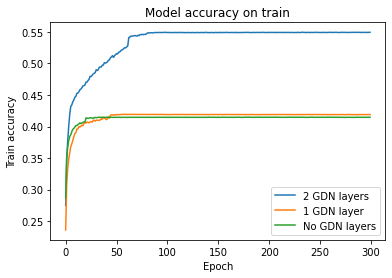

In [39]:
# Plot the train accuracy
plt.plot(history_contrast_2_gdn.history['accuracy'])
plt.plot(history_contrast_1_gdn.history['accuracy'])
plt.plot(history_contrast_no_gdn.history['accuracy'])
plt.title('Model accuracy on train')
plt.ylabel('Train accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

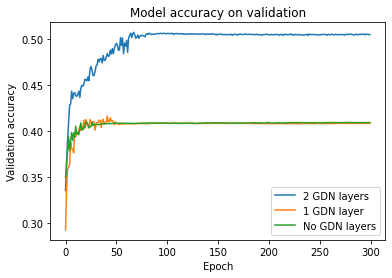

In [40]:
# Plot the validation accuracy
plt.plot(history_contrast_2_gdn.history['val_accuracy'])
plt.plot(history_contrast_1_gdn.history['val_accuracy'])
plt.plot(history_contrast_no_gdn.history['val_accuracy'])
plt.title('Model accuracy on validation')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'lower right')
plt.show()

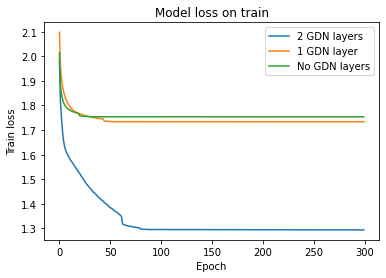

In [41]:
# Plot the train loss
plt.plot(history_contrast_2_gdn.history['loss'])
plt.plot(history_contrast_1_gdn.history['loss'])
plt.plot(history_contrast_no_gdn.history['loss'])
plt.title('Model loss on train')
plt.ylabel('Train loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

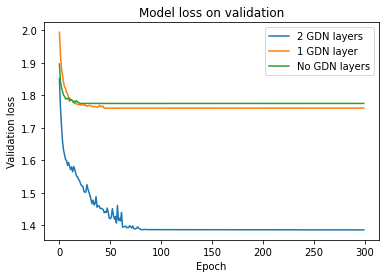

In [42]:
# Plot the validation loss
plt.plot(history_contrast_2_gdn.history['val_loss'])
plt.plot(history_contrast_1_gdn.history['val_loss'])
plt.plot(history_contrast_no_gdn.history['val_loss'])
plt.title('Model loss on validation')
plt.ylabel('Validation loss')
plt.xlabel('Epoch')
plt.legend(['2 GDN layers', '1 GDN layer', 'No GDN layers'], loc = 'upper right')
plt.show()

### Evaluate the models

In [43]:
# Evaluate the model with 2 GDN layers
print(model_contrast_2_GDN.evaluate(x_test_contrast, y_test))

# Evaluate the model with 1 GDN layer
print(model_contrast_1_GDN.evaluate(x_test_contrast, y_test))

# Evaluate the model with no GDN layers
print(model_contrast_no_GDN.evaluate(x_test_contrast, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 1.3889 - accuracy: 0.5076
[1.3888813257217407, 0.5076000094413757]
313/313 [==============================] - 1s 2ms/step - loss: 1.7692 - accuracy: 0.3993
[1.769185185432434, 0.3993000090122223]
313/313 [==============================] - 1s 2ms/step - loss: 1.7773 - accuracy: 0.4034
[1.7772691249847412, 0.4034000039100647]
